Connecting boazmohar@mesoscale-activity.datajoint.io:3306


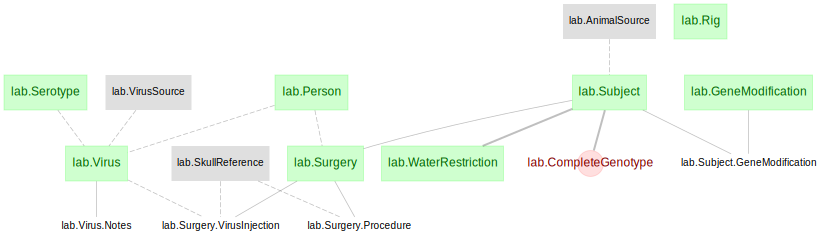

In [1]:
%matplotlib inline
import datajoint as dj
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.config['database.user'] = 'boazmohar'
dj.config['database.password'] = 'rodent-research'
# dj.config['database.host'] = 'localhost'
# dj.config['database.user'] = 'root'
# dj.config['database.password'] = 'tutorial'
dj.conn()
import lab
dj.ERD(lab)

In [2]:
def dropdbs():
    print('dropping databases: \n\n')
    for d in ['experiment', 'lab',]:
        try:
            schema = dj.schema('boazmohar_%s' % d, locals())
            schema.drop(force=True)
            print('dropping {d}'.format(d=d))
        except Exception as e:
            print('error dropping {d}: {e}'
                 .format(d=d, e=str(e)))


In [3]:
from lab import *
s = Subject()
s.insert1((394215, 123456, '2017-02-05', 'M', 'Jackson Labs'))
s.insert1((394220, 123456, '2017-02-05', 'F', 'Jackson Labs'))
s.insert1((394219, 123456, '2017-02-05', 'F', 'Jackson Labs'))
s.insert1((397353, 123456, '2017-06-06', 'M', 'Jackson Labs'))
s.insert1((397354, 123456, '2017-06-06', 'M', 'Jackson Labs'))
s.insert1((397357, 123456, '2017-06-06', 'F', 'Jackson Labs'))
s.insert1((388614, 123456, '2017-04-15', 'M', 'Jackson Labs'))

# 
wr = WaterRestriction()
wr.insert1((394215,70, 345678, '2017-01-01', 20.3))
wr.insert1((394220,71, 345678, '2017-01-01', 20.3))
wr.insert1((394219,72, 345678, '2017-01-01', 20.3))
wr.insert1((397353,73, 345678, '2017-01-01', 20.3))
wr.insert1((397354,74, 345678, '2017-01-01', 20.3))
wr.insert1((397357,75, 345678, '2017-01-01', 20.3))
wr.insert1((388614,76, 345678, '2017-01-01', 20.3))

lab.Person().insert1(('boazmohar', 'Boaz Mohar'))

se = Serotype()
se.insert([('AAV2/1',), ('SL1',),('Rabies',),('Adenovirus',),
           ('AAV9',),('AAV2/10',),('AAV8',),('AAV2/8',),('AAV2/5',),('AAV2/2',)])

v = Virus()
v.insert1((148, 'upenn', 'AAV2/1', 'boazmohar', 'GCAMP6f',1.3e13, '2018-01-08','good'))
v.insert1((137, 'upenn', 'AAV2/1', 'boazmohar','CRE',1.2e13, '2018-01-08','good'))
v.insert1((149, 'upenn', 'AAV2/1', 'boazmohar','GCAMP6s',1.3e13, '2018-01-08','good'))
v.insert1((111, 'janelia', 'AAV2/1', 'boazmohar','GCAMP7s',1.3e13, '2018-01-08','good'))

g = GeneModification()
g.insert([('Syt17-cre', ''), ('ACTB-tTa', ''), ('Chrna2-cre', ''), ('CamK2a-tTA', ''), ('TITL-GCaMP6f', '')], skip_duplicates=True)

s_gm = Subject.GeneModification()
s_gm.insert1((388614,'Chrna2-cre', 'Unknown', 'Unknown'))

lab.Rig().insert1(('2p_spine','2c.382', 'Two Photopn high NA'))

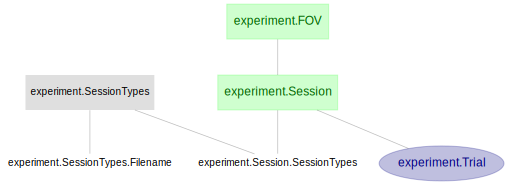

In [4]:

import experiment
dj.ERD(experiment)

In [5]:
# dropdbs()

In [6]:
from experiment import *

fov = FOV()
#70 1
fov.insert1((394215, 1, '2017-07-29', 'One injections site, nice sparsity')) 
#72 1
fov.insert1((394219, 1, '2017-08-07', 'Left FOV with more cells., there is another one more to the right and down'))
#70 2
fov.insert1((394215, 2, '2017-09-02', 'Higher expression, same Location as fov1'))
#71 1
fov.insert1((394220, 1, '2017-07-30', 'Missing in google sheets'))
#72 2
fov.insert1((394219, 2, '2017-09-02', 'same area as FOV1'))
#73 1
fov.insert1((397353, 1, '2017-09-20', 'Lower injection ISO'))
#74 1
fov.insert1((397354, 1, '2017-09-20', 'ISO'))
#76 1
fov.insert1((388614, 1, '2017-10-03', 'ISO'))
#75 1
fov.insert1((397357, 1, '2017-10-03', 'ISO'))
#75 2
fov.insert1((397357, 2, '2017-10-24', 'ISO'))
#74 2
fov.insert1((397354, 2, '2017-10-26', 'ISO'))
#74 3
fov.insert1((397354, 3, '2017-12-06', 'ISO'))
#75 3
fov.insert1((397357, 3, '2018-01-03', 'ISO'))

types = SessionTypes()
types.insert1(('Stack',))
types.insert1(('Spines',))
types.insert1(('Cellbodies',))
types.insert1(('Manual_mroi',))
types.insert1(('Vision',))
files = SessionTypes.Filename()

files.insert1(('Spines','Sp.mat'))
files.insert1(('Cellbodies','Sp.mat'))
files.insert1(('Vision','vis*.p'))
files.insert1(('Vision','*.psyexp'))

In [7]:

# s = Subject()
# s.insert1((394215, 123456, '2017-02-05', '2017-07-14', 'M', 'Jackson Labs'))
# s.insert1((394220, 123456, '2017-02-05', '2017-07-14', 'F', 'Jackson Labs'))
# s.insert1((394219, 123456, '2017-02-05', '2017-07-26', 'F', 'Jackson Labs'))
# s.insert1((397353, 123456, '2017-06-06', '2017-08-24', 'M', 'Jackson Labs'))
# s.insert1((397354, 123456, '2017-06-06', '2017-08-24', 'M', 'Jackson Labs'))
# s.insert1((397357, 123456, '2017-06-06', '2017-09-17', 'F', 'Jackson Labs'))
# s.insert1((388614, 123456, '2017-04-15', '2017-09-29', 'M', 'Jackson Labs'))

# strains = Subject.Strain()
# strains.insert1((394215,'wt'))
# strains.insert1((394220,'wt'))
# strains.insert1((394219,'wt'))
# strains.insert1((397353,'wt'))
# strains.insert1((397354,'wt'))
# strains.insert1((397357,'wt'))